# Cars Price Prediction Project

Welcome to the Cars Price Prediction Project! 

As a vehicle salesperson, understanding the potential spending capacity of consumers is crucial for creating personalized sales strategies. In this project, we aim to develop a predictive model that estimates the overall amount customers are likely to spend. To achieve this, we will leverage a diverse set of customer characteristics including their name, email, country, gender, age, annual salary, credit card debt, and net worth.

By analyzing these attributes, we intend to uncover valuable insights that can guide sales efforts towards a more targeted and effective approach. This EDA process will lay the foundation for the  development of a predictive model, enabling to better serve customers and optimize sales strategies.

In [1]:
# Importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
# Read the dataset 
df = pd.read_csv('C:/Users/yomna/SalesPricePrediction/Dataset/car_purchasing.csv',  encoding='ISO-8859-1')
df.head()

,customer name,customer e-mail,country,gender,age,annual Salary,credit card debt,net worth,car purchase amount
0,Martina Avila,cubilia.Curae.Phasellus@quisaccumsanconvallis.edu,Bulgaria,0,41.851720,62812.09301,11609.380910,238961.2505,35321.45877
1,Harlan Barnes,eu.dolor@diam.co.uk,Belize,0,40.870623,66646.89292,9572.957136,530973.9078,45115.52566
2,Naomi Rodriquez,vulputate.mauris.sagittis@ametconsectetueradip...,Algeria,1,43.152897,53798.55112,11160.355060,638467.1773,42925.70921
3,Jade Cunningham,malesuada@dignissim.com,Cook Islands,1,58.271369,79370.03798,14426.164850,548599.0524,67422.36313
4,Cedric Leach,felis.ullamcorper.viverra@egetmollislectus.net,Brazil,1,57.313749,59729.15130,5358.712177,560304.0671,55915.46248


In [3]:
# Understanding the dataset through looking at the dataset's shape, datatypes, nulls, Summary Statistics and more
df.shape 

(500, 9)

In [4]:
df.describe()

,gender,age,annual Salary,credit card debt,net worth,car purchase amount
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,0.506000,46.241674,62127.239608,9607.645049,431475.713625,44209.799218
std,0.500465,7.978862,11703.378228,3489.187973,173536.756340,10773.178744
min,0.000000,20.000000,20000.000000,100.000000,20000.000000,9000.000000
25%,0.000000,40.949969,54391.977195,7397.515792,299824.195900,37629.896040
50%,1.000000,46.049901,62915.497035,9655.035568,426750.120650,43997.783390
75%,1.000000,51.612263,70117.862005,11798.867487,557324.478725,51254.709517
max,1.000000,70.000000,100000.000000,20000.000000,1000000.000000,80000.000000


In [5]:
df.info() # Checking each column's datatype

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   customer name        500 non-null    object 
 1   customer e-mail      500 non-null    object 
 2   country              500 non-null    object 
 3   gender               500 non-null    int64  
 4   age                  500 non-null    float64
 5   annual Salary        500 non-null    float64
 6   credit card debt     500 non-null    float64
 7   net worth            500 non-null    float64
 8   car purchase amount  500 non-null    float64
dtypes: float64(5), int64(1), object(3)
memory usage: 35.3+ KB


In [6]:
# Finding Duplicates in the dataframe
duplicates = df[df.duplicated()]
print(duplicates) # Returns an empty dataframe, no duplicates are found

Empty DataFrame
Columns: [customer name, customer e-mail, country, gender, age, annual Salary, credit card debt, net worth, car purchase amount]
Index: []


In [7]:
null_num = df.isna().sum() # Finding the sum of null values per column
print(null_num)

customer name          0
customer e-mail        0
country                0
gender                 0
age                    0
annual Salary          0
credit card debt       0
net worth              0
car purchase amount    0
dtype: int64


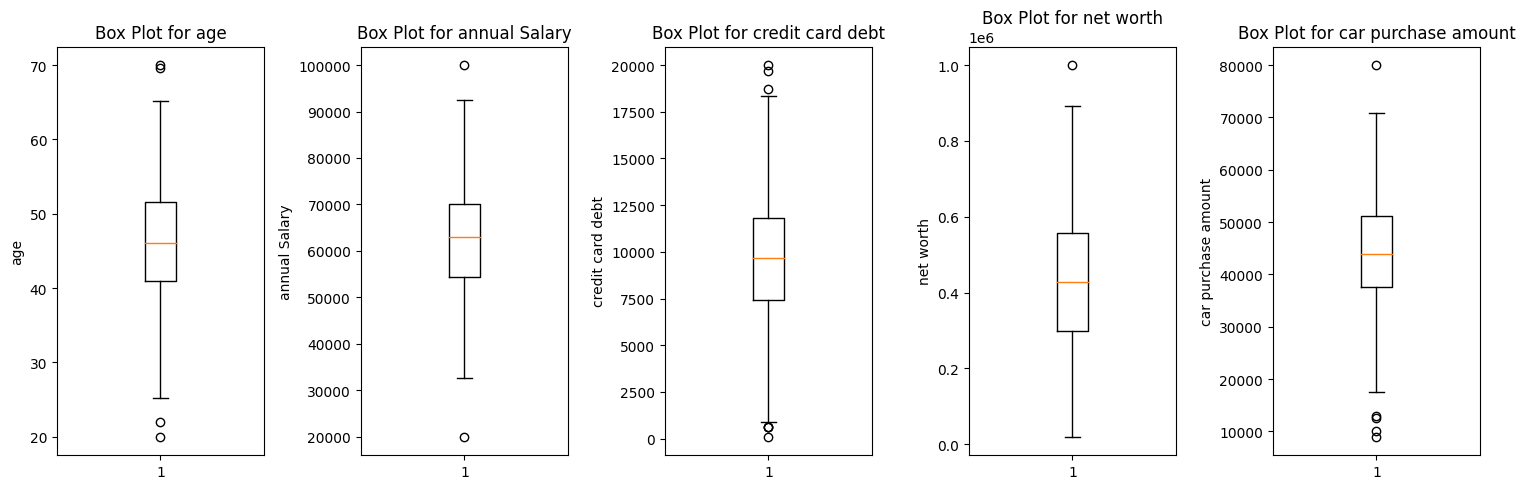

In [8]:
# Finding Outliners in the dataframe
# Filtering out numerical columns 
numerical_columns = ['age', 'annual Salary', 'credit card debt', 'net worth', 'car purchase amount']

# Looping through each columns
for column in numerical_columns:
    # Calculating the IQR
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    
    # Defining the lower and upper bounds for outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Find the outliers
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    
# Visualizing outliners
fig, axes = plt.subplots(nrows=1, ncols=len(numerical_columns), figsize=(15, 5))

# Looping through each column to create a box plot
for i, column in enumerate(numerical_columns):
    ax = axes[i]
    ax.boxplot(df[column])
    ax.set_title(f'Box Plot for {column}')
    ax.set_ylabel(column)

plt.tight_layout()
plt.show()

C:\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\yomna\AppData\Local\Temp\ipykernel_40800\402626602.py:3: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


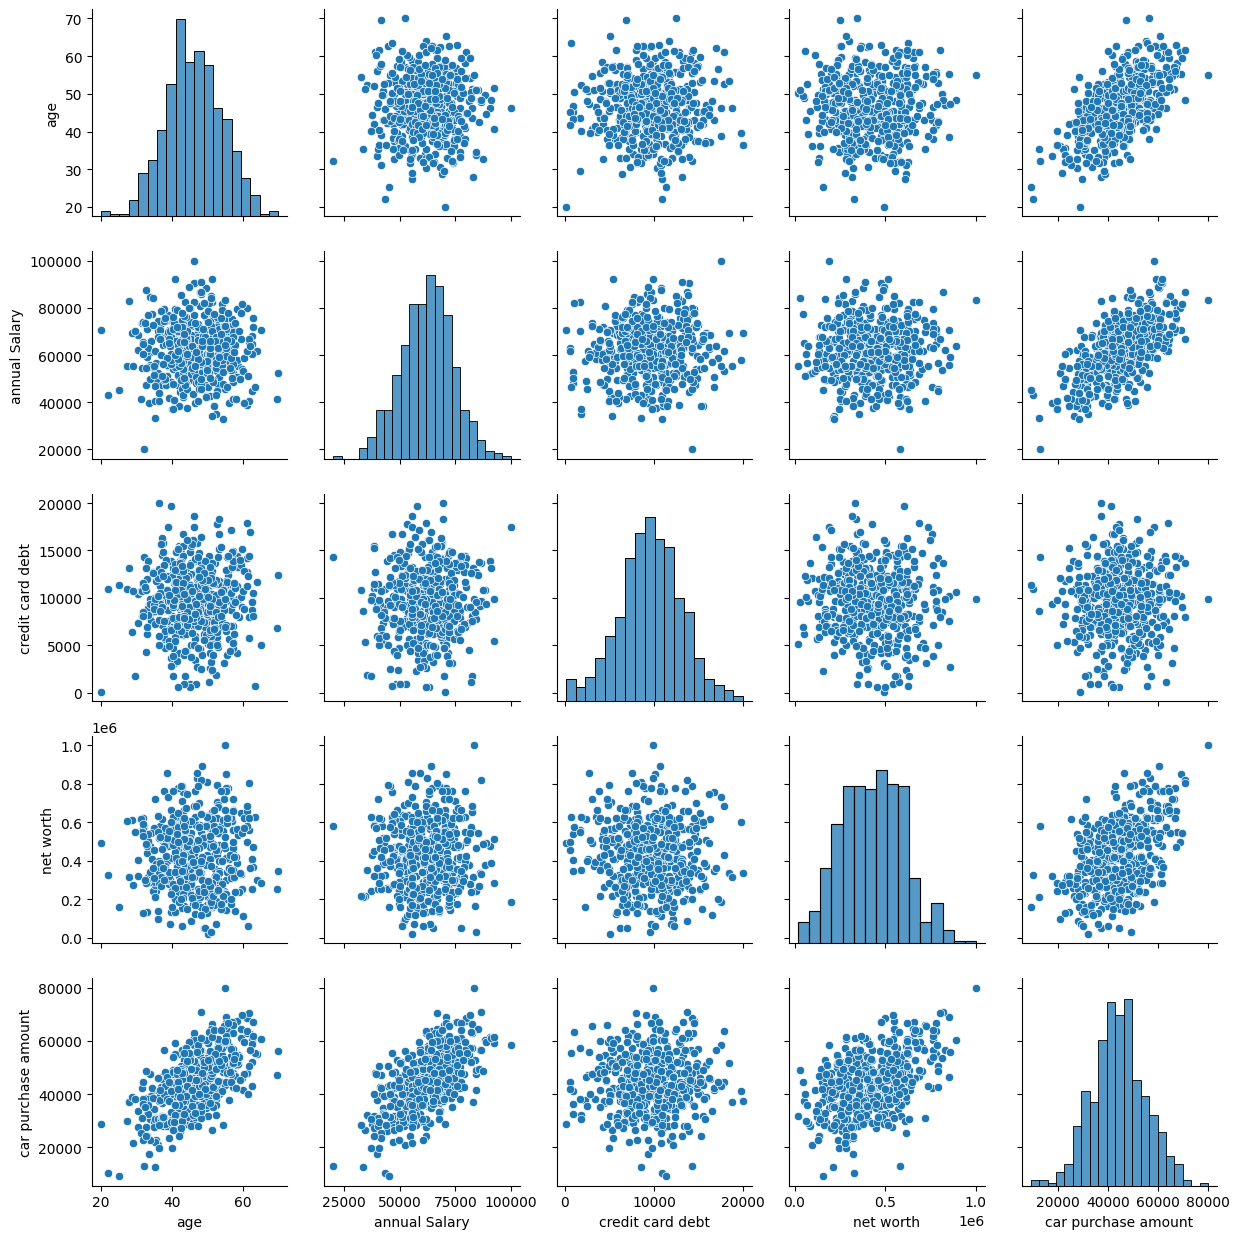

In [9]:
# Using Pair Plots to visualize relationships between the numerical variables
sns.pairplot(df[numerical_columns])
plt.tight_layout()
plt.show()

# Problems with the dataframe

After exploring the data we found the following
- No missing values or null in the dataframe
- No notable outliners in the dataframe
- No duplicates were found in the dataframe
 
The dataset is overall clean however the following must be changed: 
- formating age column from float to integer

Other than that, the dataframe is clean and ready!

In [10]:
# Changeing age column from float to integer
df['age'] = df['age'].astype(int)
print(df['age'])

0      41
1      40
2      43
3      58
4      57
       ..
495    41
496    37
497    53
498    59
499    46
Name: age, Length: 500, dtype: int32


# Forming Hypotheses

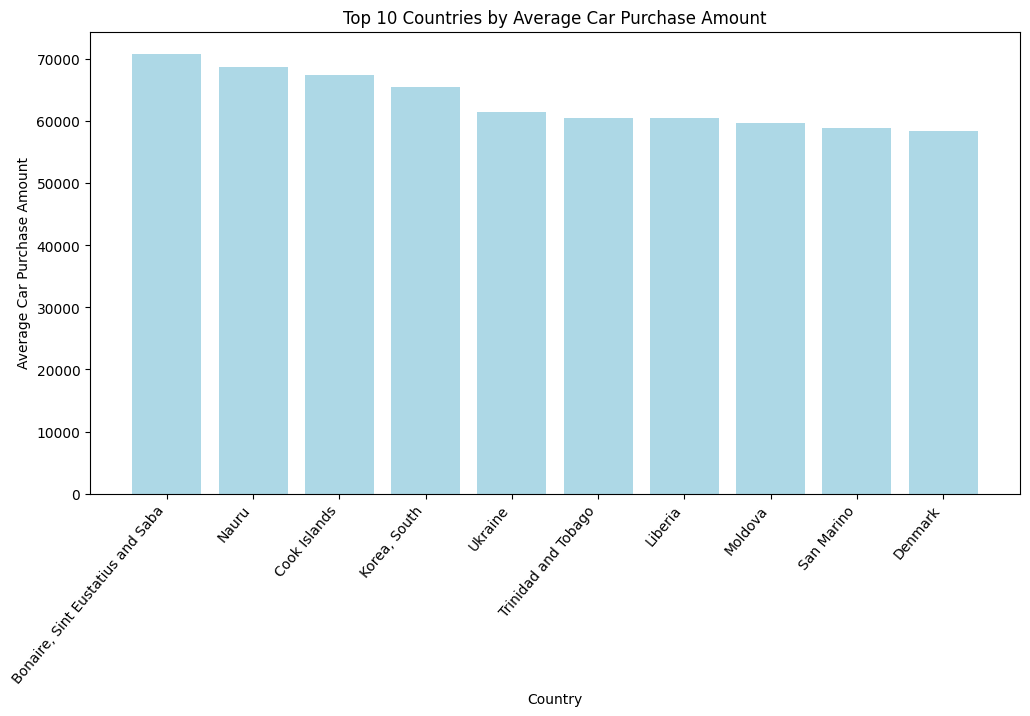

In [11]:
# Hypothesis One: There exists a significant connection between country and car purchase amount
country_purchase_stats = df.groupby('country')['car purchase amount'].mean()

# Visualizing the top 10 countries by average purchase amount
N = 10  
top_countries = country_purchase_stats.nlargest(N)

plt.figure(figsize=(12, 6))
plt.bar(top_countries.index, top_countries.values, color='lightblue')
plt.xlabel('Country')
plt.ylabel('Average Car Purchase Amount')
plt.title(f'Top {N} Countries by Average Car Purchase Amount')
plt.xticks(rotation=50, ha='right')
plt.show()

# in conclusion, the top countries from which the highest car purchases are from Bonaire, Sint Eustatius and Saba, Nauru, Cook Island, South Korea, Ukraine, Trinidad and Tobago, Liberia, Moldova, San Marino, and Denmark

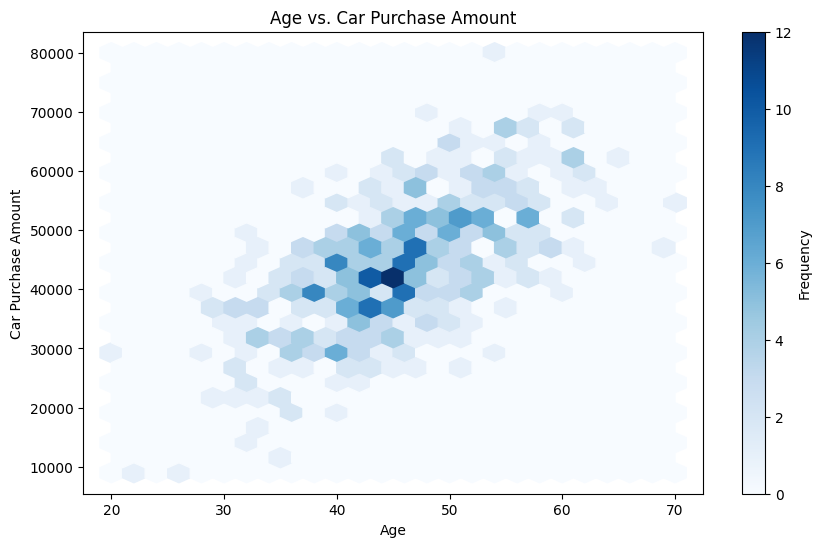

The median age is: 46.0


In [12]:
# Hypothesis Two: There exists a significant connection between age and the Car Purchase Amount
plt.figure(figsize=(10, 6))
plt.hexbin(df['age'], df['car purchase amount'], gridsize=25, cmap='Blues')
plt.xlabel('Age')
plt.ylabel('Car Purchase Amount')
plt.title('Age vs. Car Purchase Amount')
plt.colorbar(label='Frequency')
plt.show()

median_age = df['age'].median()
print(f"The median age is: {median_age}")

# in conclusion, there is connection between age and Car Purchase Amount where the average car buyer is 46 

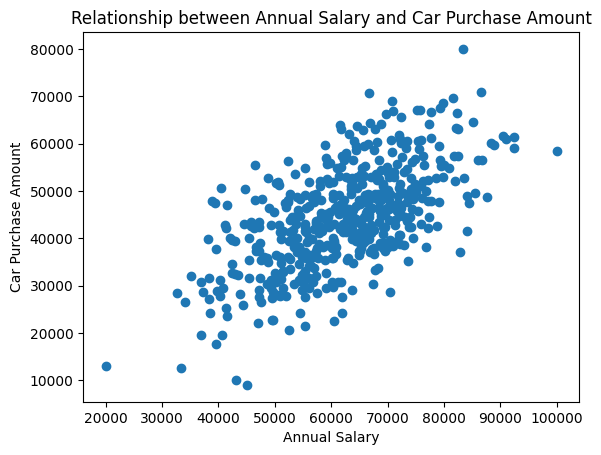

The median Annual Salary is: 62915.497035


In [13]:
# Hypothesis three: There exists a significant connection between Annual Salary and the Car Purchase Amount

plt.scatter(df['annual Salary'], df['car purchase amount'])
plt.xlabel('Annual Salary')
plt.ylabel('Car Purchase Amount')
plt.title('Relationship between Annual Salary and Car Purchase Amount')
plt.show()

median_Salary = df['annual Salary'].median()
print(f"The median Annual Salary is: {median_Salary}")

# in conclusion, there is connection between Annual Salary and Car Purchase Amount where the average yearly salary of a buyer is 62,915
# when the Annual Salary increases, Car Purchase Amount tends to increase with it as well

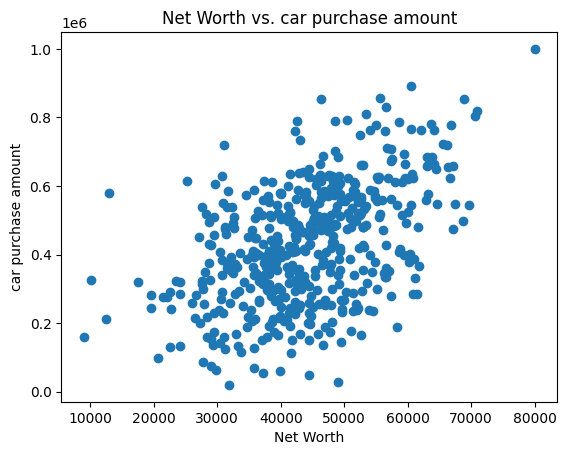

The median net worth is: 426750.12065


In [14]:
# Hypothesis Four: There exists a significant connection between net worth and car purchase amount

plt.scatter(df['car purchase amount'], df['net worth'],)
plt.xlabel('Net Worth')
plt.ylabel('car purchase amount')
plt.title('Net Worth vs. car purchase amount')
plt.show()

median_networth = df['net worth'].median()
print(f"The median net worth is: {median_networth}")
# in conclusion, there is connection between net worth and Car Purchase Amount where the average net worth of a buyer is 426,750
# when the net worth increases, Car Purchase Amount tends to increase with it as well

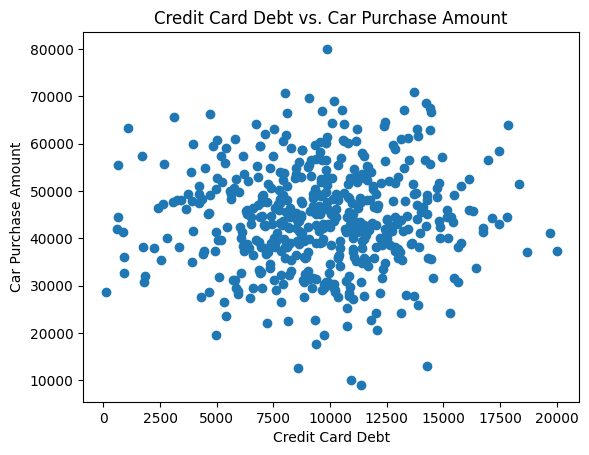

The median Credit Card Debt is: 9655.035568


In [15]:
# Hypothesis Five: There exists a significant connection between Credit Card Debt and the Car Purchase Amount
plt.scatter(df['credit card debt'], df['car purchase amount'])
plt.xlabel('Credit Card Debt')
plt.ylabel('Car Purchase Amount')
plt.title('Credit Card Debt vs. Car Purchase Amount')
plt.show()

median_debt = df['credit card debt'].median()
print(f"The median Credit Card Debt is: {median_debt}")
#in conclusion, there is connection between Credit Card Debt and Car Purchase Amount where the average Credit Card Debt of a buyer is 9,655

## In conclusion, the analysis reveals several key findings

In conclusion, the top countries with the highest car purchases are Bonaire, Sint Eustatius and Saba, Nauru, Cook Island, South Korea, Ukraine, Trinidad and Tobago, Liberia, Moldova, San Marino, and Denmark. These countries demonstrate significant consumer interest in car purchases.

Additionally, our exploratory data analysis revealed a meaningful connection between age and Car Purchase Amount. On average, the typical car buyer is 46 years old.

Furthermore, a substantial relationship was observed between Annual Salary and Car Purchase Amount. The average yearly salary of a buyer is approximately $62,915. As Annual Salary increases, Car Purchase Amount tends to exhibit a corresponding increase.

Moreover, there exists a notable connection between net worth and Car Purchase Amount. The average net worth of a buyer is around $426,750. As net worth increases, Car Purchase Amount tends to rise in tandem.

Finally, our analysis highlights a connection between Credit Card Debt and Car Purchase Amount. On average, the Credit Card Debt of a buyer is approximately $9,655. This suggests that individuals with varying levels of credit card debt are making significant car purchases.